# Imports

In [3]:
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.linear_model import ARDRegression
from sklearn.preprocessing import LabelEncoder
import pandas
import numpy
import data_massage
import itertools
import matplotlib.pyplot as plt

In [4]:
metadata, full_data, induction_only = data_massage.load_data()
summarized_data = data_massage.summarize_data(metadata, induction_only)

In [5]:
var_data = summarized_data
var_features = var_data[["R_mean_mean", "Temp_mean", "Humidity_mean"]]

var_train_x, var_test_x, var_train_y, var_test_y = train_test_split(
      var_features
    , var_data["class"]
    , test_size=0.2
    , stratify=var_data["class"]
    , random_state=7
)

label_encoder = LabelEncoder()
label_encoder.fit(var_data["class"])
var_train_y = label_encoder.transform(var_train_y)
var_test_y = label_encoder.transform(var_test_y)

In [6]:
# create the grid search variables, but do not execute them
var_training_pipeline = Pipeline(steps=[("model", ARDRegression())])


#ARDRegression(tol=0.001, alpha_1=1e-06, alpha_2=1e-06, lambda_1=1e-06, lambda_2=1e-06, threshold_lambda=10000.0, fit_intercept=True)

var_param = [{
    "model__tol": [1e-1, 1e-2, 1e-3, 1e-4],
    "model__alpha_1": [1e-4, 1e-5, 1e-6, 1e-7],
    "model__alpha_2": [1e-4, 1e-5, 1e-6, 1e-7],
    "model__lambda_1": [1e-4, 1e-5, 1e-6, 1e-7],
    "model__lambda_2": [1e-4, 1e-5, 1e-6, 1e-7],
}]

var_grid_search = GridSearchCV(estimator=var_training_pipeline, param_grid=var_param, cv=5, n_jobs=-1)
var_grid_search.fit(var_train_x, var_train_y)
print(var_grid_search.best_params_)

{'model__alpha_1': 1e-07, 'model__alpha_2': 0.0001, 'model__lambda_1': 0.0001, 'model__lambda_2': 0.0001, 'model__tol': 0.1}


In [7]:
#ARDRegression(*, n_iter=300, tol=0.001, alpha_1=1e-06, alpha_2=1e-06, lambda_1=1e-06, lambda_2=1e-06, compute_score=False, threshold_lambda=10000.0, fit_intercept=True, normalize='deprecated', copy_X=True, verbose=False)
var = ARDRegression(alpha_1=1e-07, alpha_2=0.0001, lambda_1 = 0.0001, lambda_2 = 0.0001, tol=0.1)
var.fit(var_train_x, var_train_y)
var_y_pred = var.predict(var_test_x)
print(var_y_pred)
print(var_test_y)
print(numpy.round(var_y_pred) == var_test_y)
#print(classification_report(var_test_y, var_y_pred, zero_division=0))

[1.13144278 1.1259493  1.04108529 1.27131245 0.95590671 1.27133738
 0.93763112 1.50172718 1.1720562  0.89233736 1.03606909 1.18943282
 1.18779212 1.18153056 1.04800253 1.1712328  1.12604499 0.95329933
 1.27747054 1.08664717]
[1 0 2 1 1 2 0 0 0 2 2 2 1 1 2 2 0 0 1 1]
[ True False False  True  True False False False False False False False
  True  True False False False False  True  True]


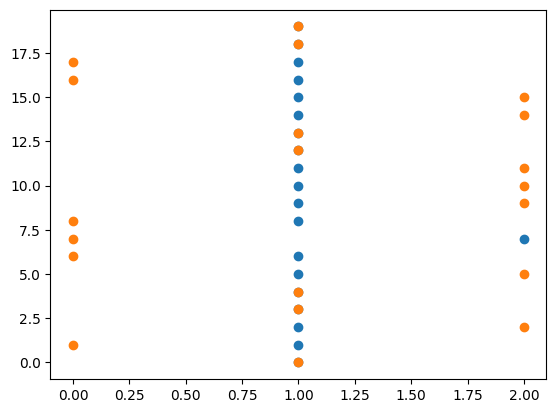

In [9]:
plt.scatter(numpy.round(var_y_pred), range(len(var_y_pred)))
plt.scatter(var_test_y, range(len(var_y_pred)))